Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
employees = pd.read_excel('./Data/Data.xlsx')

In [24]:
employees.head()

,ID,Imię,Nazwisko,Stanowisko,Zarobki,Typ Stanowiska
0,1,Anna,Kowalska,Kierownik,7500,Zarządzanie
1,2,Piotr,Nowak,Programista,6200,Techniczne
2,3,Marta,Wiśniewska,Analityk,5600,Analityczne
3,4,Andrzej,Kaczmarek,Grafik,4900,Kreatywne
4,5,Katarzyna,Zielińska,Specjalista ds. HR,5500,Administracyjne


In [25]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              60 non-null     int64 
 1   Imię            60 non-null     object
 2   Nazwisko        60 non-null     object
 3   Stanowisko      60 non-null     object
 4   Zarobki         60 non-null     int64 
 5   Typ Stanowiska  60 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.9+ KB


Calculating average earnings by department

In [5]:
avg_earnings_by_department = employees.groupby('Typ Stanowiska')['Zarobki'].mean()

In [6]:
avg_earnings_by_department

Typ Stanowiska
Administracyjne    4870.000000
Analityczne        5783.333333
Kreatywne          5100.000000
Marketing          5700.000000
Sprzedaż           5850.000000
Techniczne         5890.000000
Zarządzanie        6992.307692
Name: Zarobki, dtype: float64

Plotting the results

<Axes: title={'center': 'Average Earnings by Department'}, xlabel='Typ Stanowiska', ylabel='Zarobki'>

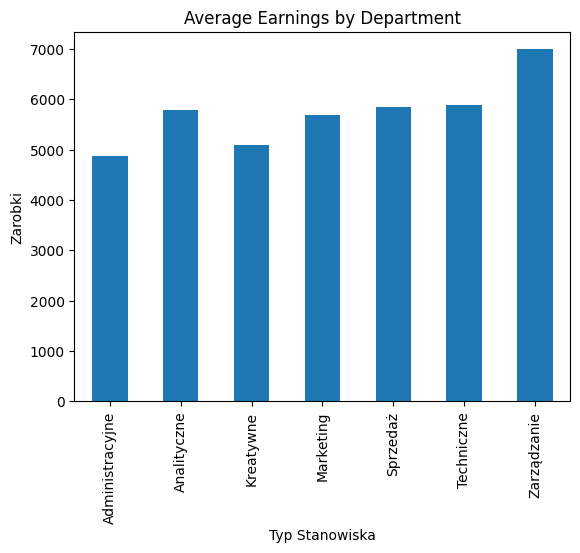

In [8]:
plt.title("Average Earnings by Department")
plt.ylabel('Zarobki')
avg_earnings_by_department.plot(kind = 'bar', x='Typ Stanowiska', y='Zarobki')

<Figure size 1200x800 with 0 Axes>

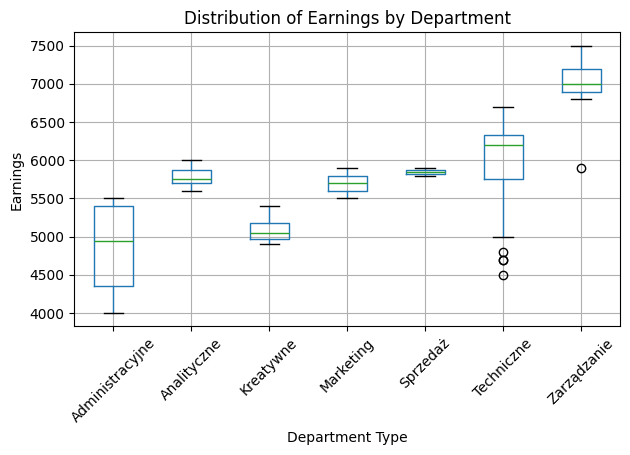

In [33]:
plt.figure(figsize=(12, 8))
employees.boxplot(column='Zarobki', by='Typ Stanowiska', rot=45)
plt.title("Podział zarobków według działów")
plt.suptitle('')
plt.xlabel('Dział')
plt.ylabel('Zarobki')
plt.tight_layout()

Lowest paid employees

In [12]:
min_salaries = employees.groupby('Typ Stanowiska')['Zarobki'].min().reset_index()
underpaid_employees = pd.merge(employees,min_salaries, on=['Typ Stanowiska','Zarobki'])

underpaid_employees

,ID,Imię,Nazwisko,Stanowisko,Zarobki,Typ Stanowiska
0,3,Marta,Wiśniewska,Analityk,5600,Analityczne
1,4,Andrzej,Kaczmarek,Grafik,4900,Kreatywne
2,8,Michał,Wójcik,Tester,4500,Techniczne
3,9,Julia,Król,Asystentka,4000,Administracyjne
4,12,Grzegorz,Piotrowski,Specjalista ds. sprzedaży,5800,Sprzedaż
5,25,Elżbieta,Kaczmarek,Kierownik ds. obsługi klienta,5900,Zarządzanie
6,36,Natalia,Kowalewska,Specjalista ds. social media,5500,Marketing


In [32]:
avg_earnings_by_department

Typ Stanowiska
Administracyjne    4870.000000
Analityczne        5783.333333
Kreatywne          5100.000000
Marketing          5700.000000
Sprzedaż           5850.000000
Techniczne         5890.000000
Zarządzanie        6992.307692
Name: Zarobki, dtype: float64

Salary equalization

In [39]:
employees_with_avg = pd.merge(employees, avg_earnings_by_department, on='Typ Stanowiska', suffixes=('', '_Średnia'))

employees_with_avg['Zarobki'] = employees_with_avg['Zarobki'].astype(float)

condition = employees_with_avg['Zarobki'] < employees_with_avg['Zarobki_Średnia']

employees_with_avg['Rise to mean'] = 0.0  
employees_with_avg.loc[condition, 'Rise to mean'] = employees_with_avg.loc[condition, 'Zarobki_Średnia'] - employees_with_avg.loc[condition, 'Zarobki']

grouped_rise_to_mean = employees_with_avg[employees_with_avg['Rise to mean'] > 0].groupby(['Imię', 'Nazwisko', 'ID'])['Rise to mean'].sum().reset_index()

grouped_rise_to_mean

,Imię,Nazwisko,ID,Rise to mean
0,Alicja,Majewska,15,83.333333
1,Andrzej,Kaczmarek,4,200.000000
2,Bartosz,Lisowski,18,1190.000000
3,Damian,Kowalewski,16,192.307692
4,Elżbieta,Kaczmarek,25,1092.307692
5,Emil,Mazur,39,100.000000
6,Grzegorz,Piotrowski,12,50.000000
7,Helena,Wilk,48,92.307692
8,Julia,Król,9,870.000000
9,Justyna,Wierzbowska,38,192.307692
